In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing excel files using pandas


In [3]:
leads_basic_details = pd.read_csv("leads_basic_details.csv")
leads_demo_watched_details = pd.read_csv("leads_demo_watched_details.csv")
leads_interaction_details = pd.read_csv("leads_interaction_details.csv")
leads_reasons_for_no_interest = pd.read_csv("leads_reasons_for_no_interest.csv")
sales_managers_assigned_leads_details = pd.read_csv("sales_managers_assigned_leads_details.csv")

In [4]:
sales_managers_assigned_leads_details

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005
...,...,...,...,...,...
355,SNR501MG,JNR1001MG,2/19/2022,4,USR1356
356,SNR501MG,JNR1001MG,1/1/2022,1,USR1357
357,SNR501MG,JNR1001MG,1/8/2022,2,USR1358
358,SNR501MG,JNR1001MG,1/15/2022,3,USR1359


Extracting information of leads which were assigned to Jr Sales Manager

In [5]:
leads_basic_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


 As there are no null values in the file, tried to remove outliers if any 
 
 
 
 
 In order to identity outliers, printing unique values from  "age" column and plotting box plot to identify them easily

In [6]:
leads_basic_details.age.unique()

array([ 16,  20,  21,  22,  25,  18,  24, 211, 116], dtype=int64)

age    AxesSubplot(0.125,0.787927;0.352273x0.0920732)
dtype: object

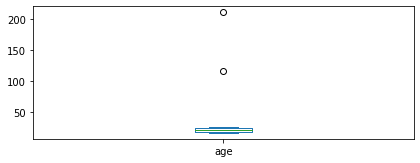

In [7]:
leads_basic_details.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

While trying to remove outliers using age column, I came across  age: 211 and 116 which seems to be like outliers as age in that range is unusual .



In [8]:
leads_basic_details.query('age>60')

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


Excluding age :211 and 116 from the main data

In [9]:
leads_basic_details_ro=leads_basic_details.query('age<60')
leads_basic_details_ro

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


age    AxesSubplot(0.125,0.787927;0.352273x0.0920732)
dtype: object

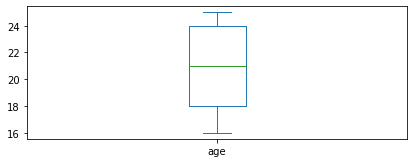

In [10]:
leads_basic_details_ro.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [11]:
leads_basic_details_ro.current_education.value_counts()

B.Tech                    139
Looking for Job           117
Degree                     42
Intermediate               40
Intermediate Completed     12
10th Completed              8
Name: current_education, dtype: int64

As 'Intermediate' and 'Intermediate Completed' both are same, combining these two into one cateogary 'Intermediate'

In [12]:
leads_basic_details_ro.current_education.replace({'Intermediate Completed':'Intermediate'}, inplace=True)

C:\Python 3.10\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
leads_basic_details_ro.current_education.unique()

array(['Intermediate', 'B.Tech', 'Degree', 'Looking for Job',
       '10th Completed'], dtype=object)

After removing outliers using age column, now analysing the source from which leads were generated

In [14]:
leads_basic_details_ro.lead_gen_source.unique()

array(['social_media', 'user_referrals', 'website', 'SEO',
       'email_marketing'], dtype=object)

Generating counts of each source used by leads and plotting this info in the form of graphical format

Source Details

In [15]:
leads_basic_details_ro.lead_gen_source.value_counts()

social_media       85
SEO                75
email_marketing    73
user_referrals     66
website            59
Name: lead_gen_source, dtype: int64

Plotting source percentage using pie chart and bars

Text(0.5, 1.0, 'Lead Source')

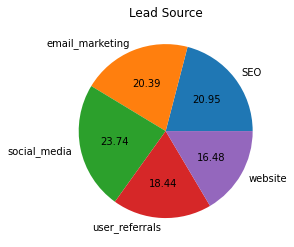

In [16]:
pie = leads_basic_details_ro.groupby('lead_gen_source').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie.set_title("Lead Source")

Text(0.5, 1.0, 'Count of leads in different cities')

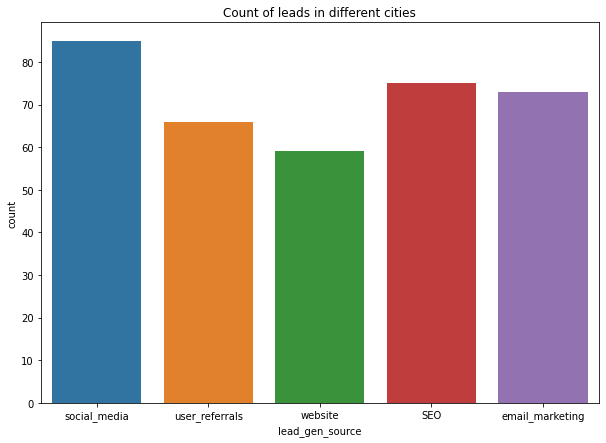

In [120]:
countplt, bar = plt.subplots(figsize = (10,7))
bar =sns.countplot(x = 'lead_gen_source', data=leads_basic_details_ro)
plt.title("Count of leads in different cities")

Above plots and informations tells that nearly 1/4th(23.74%) of leads came to know about the EdTech firm through Social media, where 'SEO' and 'email_marketing' are next important source around 20% each

All the sources are contributing approximately equally 

City details


In [18]:
leads_basic_details_ro.current_city.value_counts()

Visakhapatnam    76
Hyderabad        75
Kochi            67
Bengaluru        51
Mumbai           48
Chennai          41
Name: current_city, dtype: int64

Text(0.5, 1.0, 'Percentage distribution of Leads from Different cities ')

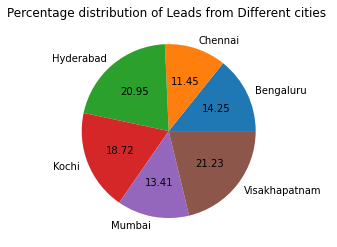

In [19]:
pie = leads_basic_details_ro.groupby('current_city').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie.set_title("Percentage distribution of Leads from Different cities ")

We can see that majority of leads are from 'Hyderabad' and 'Visakhapatnam'

Now we will analyse what language these leads are prefering from respective places

In [20]:
leads_demo_watched_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


watched_percentage    AxesSubplot(0.125,0.787927;0.352273x0.0920732)
dtype: object

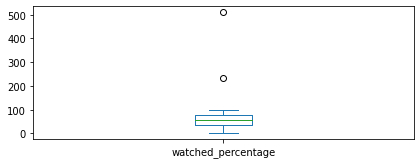

In [21]:
leads_demo_watched_details.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

We can observe outliers here from the above box plot, So we will remove rows which are having 'watched_percentage' more than '100%' them in the next step

In [22]:
leads_demo_watched_details_n=leads_demo_watched_details.query('watched_percentage<=100')
leads_demo_watched_details_n.head(3)

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35


In [23]:
df_leads_city_lang_details = pd.merge(leads_demo_watched_details_n, leads_basic_details_ro, how='inner', on = 'lead_id')
df_leads_city_lang_details.head()

,lead_id,demo_watched_date,language,watched_percentage,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1002,1/4/2022,Telugu,42,20,MALE,Bengaluru,B.Tech,Business,user_referrals
1,USR1003,1/7/2022,Telugu,81,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
2,USR1004,1/2/2022,Telugu,35,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
3,USR1005,1/3/2022,Hindi,38,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
4,USR1006,1/12/2022,Hindi,54,16,MALE,Kochi,Intermediate,Doctor,user_referrals


Language details


In [24]:
df_leads_city_lang_details.language.value_counts()

English    111
Telugu      61
Hindi       19
Name: language, dtype: int64

Text(0.5, 1.0, 'Languages count')

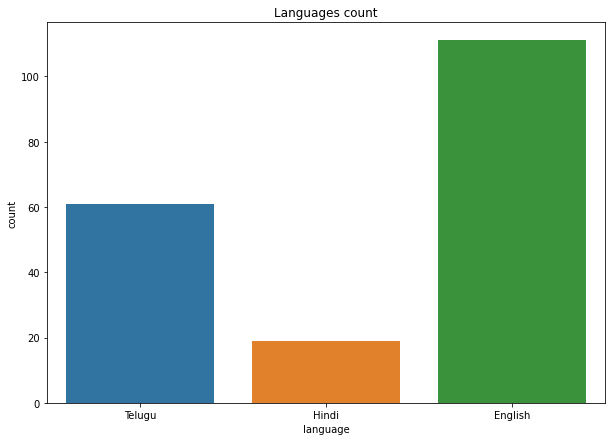

In [25]:
countplt, bar = plt.subplots(figsize = (10,7))
bar =sns.countplot(x = 'language', data=df_leads_city_lang_details)
plt.title("Languages count")

We can observer that 'Hindi' is the least preferred languages among others and 'English' is highest preferred one

Plotting Count of leads preferring languages from each city

Text(0.5, 1.0, 'Percentage of Languages preferred by leads')

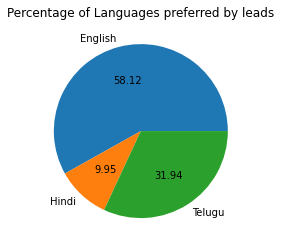

In [26]:
pie2 = df_leads_city_lang_details.groupby('language').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie2.set_title("Percentage of Languages preferred by leads")

In [27]:
df_leads_city_lang_details.groupby(['language', 'current_city']).size()

language  current_city 
English   Bengaluru        22
          Chennai          17
          Hyderabad        20
          Kochi            19
          Mumbai           11
          Visakhapatnam    22
Hindi     Bengaluru         3
          Chennai           6
          Hyderabad         3
          Kochi             4
          Mumbai            1
          Visakhapatnam     2
Telugu    Bengaluru         7
          Chennai           7
          Hyderabad        17
          Kochi             8
          Mumbai            7
          Visakhapatnam    15
dtype: int64

Leads from mumbai have least count comparivetly 


Majority of the Leads are from 'Hyderabad' and 'Visakhapatnam', maximum of them are  preferring 'Telugu'  as that is their native language 

Analyzing data from other tables

In [28]:
sales_managers_assigned_leads_details.head()


,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005


In [29]:
leads_interaction_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [30]:
leads_interaction_details

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup
...,...,...,...,...,...,...
2187,JNR1001MG,USR1356,lead,2/21/2022,unsuccessful,lead_introduction
2188,JNR1001MG,USR1357,lead,1/8/2022,unsuccessful,lead_introduction
2189,JNR1001MG,USR1358,lead,1/12/2022,unsuccessful,lead_introduction
2190,JNR1001MG,USR1359,lead,1/22/2022,unsuccessful,lead_introduction


In [31]:
leads_interaction_details.lead_stage.value_counts()

lead             1547
consideration     331
awareness         250
conversion         64
Name: lead_stage, dtype: int64

While analysing 'leads_interaction_details' table, we will consider 'call_status' which are successfull because we cant conclude the reason for not lifting the call as the reason might be  either they dont have interest so they did not attended the demo or they might miss the call unintentionally

In [35]:
len(leads_interaction_details.query('call_status=="successful"'))

1866

In [36]:
leads_interaction_details_s=leads_interaction_details.query('call_status=="successful"')
leads_interaction_details_s.head()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


In [37]:
len(leads_interaction_details.query('call_status=="unsuccessful"'))

326

In [38]:
(leads_interaction_details_s.lead_stage.value_counts())

lead             1267
consideration     290
awareness         245
conversion         64
Name: lead_stage, dtype: int64

In [39]:
leads_interaction_details_s.call_reason.value_counts()

demo_not_attended             617
lead_introduction             329
demo_schedule                 321
post_demo_followup            197
followup_for_conversion       169
interested_for_conversion     121
successful_conversion          64
followup_for_consideration     48
Name: call_reason, dtype: int64

Text(0.5, 1.0, 'Leads interraction call details')

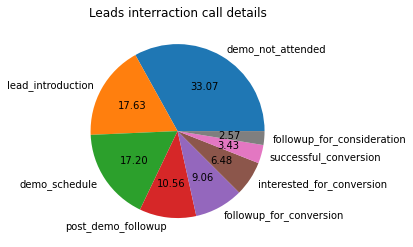

In [181]:
pie2 = leads_interaction_details_s.call_reason.value_counts().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie2.set_title("Leads interraction call details")

Maximum of leads are in 'lead' stage where 33% of them(617) have not attended demo

Now we will break the scenario into two, like why leads did not attend the demo and if they attended then how good the managers are communicating well with them

Scenario 1:

Firstly we will analyse where the counts of leads are declining rapidly so that we can improve if we lacks anything internal process

In [44]:
leads_interaction_details_s

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup
...,...,...,...,...,...,...
2175,JNR1012MG,USR1348,lead,2/28/2022,successful,demo_not_attended
2176,JNR1012MG,USR1348,awareness,2/28/2022,successful,post_demo_followup
2177,JNR1012MG,USR1348,awareness,2/28/2022,successful,followup_for_consideration
2178,JNR1012MG,USR1348,consideration,2/28/2022,successful,followup_for_conversion


In [41]:
sales_managers_assigned_leads_details

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005
...,...,...,...,...,...
355,SNR501MG,JNR1001MG,2/19/2022,4,USR1356
356,SNR501MG,JNR1001MG,1/1/2022,1,USR1357
357,SNR501MG,JNR1001MG,1/8/2022,2,USR1358
358,SNR501MG,JNR1001MG,1/15/2022,3,USR1359


In [43]:
sales_managers_assigned_leads_details.groupby('snr_sm_id').size()

snr_sm_id
SNR501MG    94
SNR502MG    80
SNR503MG    98
SNR504MG    88
dtype: int64

In [48]:
leads_interaction_details_s.query('call_reason=="demo_not_attended"').shape


(617, 6)

Leads who have answered call and not attended demo comes under the Scenario 2 which will be analysed further, for now removing these rows

In [63]:
leads_interaction_details_sna=leads_interaction_details_s.query('call_reason != "demo_not_attended"')

In [64]:
leads_interaction_details_sna.call_reason.value_counts()

lead_introduction             329
demo_schedule                 321
post_demo_followup            197
followup_for_conversion       169
interested_for_conversion     121
successful_conversion          64
followup_for_consideration     48
Name: call_reason, dtype: int64

In [89]:
leads_interaction_details_sna['row_number_by_group']=leads_interaction_details_sna.groupby(['lead_id'])['call_reason'].cumcount()+1
leads_interaction_details_sna


C:\Users\GANTIT~1\AppData\Local\Temp/ipykernel_8724/1700835091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leads_interaction_details_sna['row_number_by_group']=leads_interaction_details_sna.groupby(['lead_id'])['call_reason'].cumcount()+1


,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason,row_number_by_group
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction,1
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule,2
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction,1
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule,2
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup,3
...,...,...,...,...,...,...,...
2173,JNR1012MG,USR1348,lead,2/22/2022,successful,demo_schedule,2
2176,JNR1012MG,USR1348,awareness,2/28/2022,successful,post_demo_followup,3
2177,JNR1012MG,USR1348,awareness,2/28/2022,successful,followup_for_consideration,4
2178,JNR1012MG,USR1348,consideration,2/28/2022,successful,followup_for_conversion,5


Here in this table, it is taking data repeatatively like 'lead_intro','demo_schedule' steps are count each time under each lead

So as row_numbers are generated for each call_reason for every lead_id, extracting the last step for every leads in order to identify where maximum of count are reducing so that we can concentrate on that particular period

In [100]:
leads_interaction_details_sna.groupby(['lead_id']).max('row_number_by_group')

,row_number_by_group
lead_id,
USR1001,2
USR1002,8
USR1003,4
USR1004,3
USR1005,3
...,...
USR1333,1
USR1334,1
USR1335,2


In [102]:
leads_interaction_details_sna.groupby(['lead_id']).max('row_number_by_group').value_counts()

row_number_by_group
2                      127
3                       67
6                       44
7                       41
5                       21
4                       10
8                        9
1                        8
9                        2
dtype: int64

 47.2% leads counts rapidly declined  after conducting demo (i.e; half of the leads were dropped between 'post_demo_followup' and  'demo_schedule')

There is a chance to improve communication between managers and leads to build trust and reduce the numbers

As many of their leads are preferring Telugu next to English, so if there is any chance to provide additional support by communicating in Telugu for telugu state leads then it would be added advantage.


Scenario 2: Leads reasons for no interest

In [103]:
leads_reasons_for_no_interest.groupby('reasons_for_not_interested_in_demo').size()

reasons_for_not_interested_in_demo
Can't afford                        44
Cannot afford                        4
No time for student                 27
Student not interested in domain    28
Wants offline classes               56
Will join in final year              5
dtype: int64

Replacing 'Cant afford' to 'Cannot afford' as both have same meaning

In [141]:
leads_reasons_for_no_interest.replace({"Can't afford":"Cannot afford"}, inplace=True)

In [142]:
leads_reasons_for_no_interest.groupby('reasons_for_not_interested_in_demo').size()

reasons_for_not_interested_in_demo
Cannot afford                       48
No time for student                 27
Student not interested in domain    28
Wants offline classes               56
Will join in final year              5
dtype: int64

.

Text(0.5, 1.0, 'Reasons for not interested in demo')

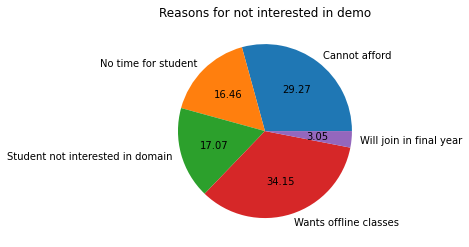

In [143]:
pie_demo = leads_reasons_for_no_interest.groupby('reasons_for_not_interested_in_demo').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie_demo.set_title("Reasons for not interested in demo")

In [144]:
leads_reasons_for_no_interest.reasons_for_not_interested_to_consider.value_counts()

Cannot afford                       32
Wants offline classes               25
Student not interested in domain    14
No time for student                  6
Will join in final year              2
Name: reasons_for_not_interested_to_consider, dtype: int64

Text(0.5, 1.0, 'Reasons for not interested to consider')

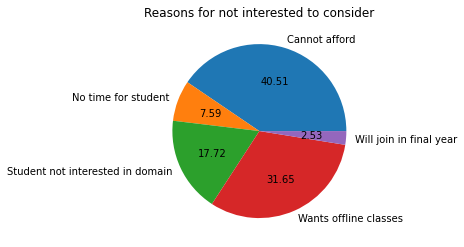

In [145]:
pie_demo = leads_reasons_for_no_interest.groupby('reasons_for_not_interested_to_consider').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie_demo.set_title("Reasons for not interested to consider")

In [146]:
leads_reasons_for_no_interest.reasons_for_not_interested_to_convert.value_counts()

Cannot afford                       19
Student not interested in domain    10
Wants offline classes               10
Will join in final year              7
No time for student                  5
Name: reasons_for_not_interested_to_convert, dtype: int64

Text(0.5, 1.0, 'Reasons for not interested to convert')

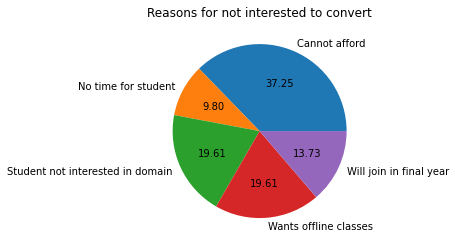

In [147]:
pie_demo = leads_reasons_for_no_interest.groupby('reasons_for_not_interested_to_convert').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
pie_demo.set_title("Reasons for not interested to convert")

Leads are dropping majorly because of as they cannot afford and they are preferring offline classes

Affordibility of course from leads can be analysed considering current_education of leads

In [148]:
df_merged_leads = leads_reasons_for_no_interest.merge(leads_basic_details_ro, how='inner', on = 'lead_id')
df_merged_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 292 non-null    object
 1   reasons_for_not_interested_in_demo      163 non-null    object
 2   reasons_for_not_interested_to_consider  78 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
 4   age                                     292 non-null    int64 
 5   gender                                  292 non-null    object
 6   current_city                            292 non-null    object
 7   current_education                       292 non-null    object
 8   parent_occupation                       292 non-null    object
 9   lead_gen_source                         292 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


In [165]:
df_merged_leads.query('reasons_for_not_interested_to_convert == [ "Cannot afford"]')['current_education'].value_counts()

Looking for Job    11
B.Tech              7
Degree              1
Name: current_education, dtype: int64

In [166]:
df_merged_leads.query('reasons_for_not_interested_to_consider == [ "Cannot afford"]')['current_education'].value_counts()

Looking for Job    16
Degree              6
Intermediate        4
B.Tech              3
10th Completed      2
Name: current_education, dtype: int64

In [167]:
df_merged_leads.query('reasons_for_not_interested_in_demo == [ "Cannot afford"]')['current_education'].value_counts()

Looking for Job    26
B.Tech             16
Degree              3
Intermediate        2
10th Completed      1
Name: current_education, dtype: int64

Maximum of the leads education has been completed and they are looking for job and other half of leads are pursuing B.tech

As majority of them are job less, parents income plays a vital role

In [169]:
df_merged_leads.query('reasons_for_not_interested_to_convert == ["Cannot afford"]')['parent_occupation'].value_counts()

Business               6
IT Employee            6
Government Employee    4
Lawyer                 2
Private Employee       1
Name: parent_occupation, dtype: int64

In [172]:
df_merged_leads.query('reasons_for_not_interested_to_consider == ["Cannot afford"]')['parent_occupation'].value_counts()

Government Employee    17
Business                6
IT Employee             4
Lawyer                  4
Name: parent_occupation, dtype: int64

In [171]:
df_merged_leads.query('reasons_for_not_interested_in_demo == ["Cannot afford"]')['parent_occupation'].value_counts()

Government Employee    17
Business               11
IT Employee             9
Lawyer                  8
Private Employee        2
Doctor                  1
Name: parent_occupation, dtype: int64

Majority of the leads parents are working either as Govt  or IT employee or business

Course will get better reach by improving factors such as providing course for affordable price and  better communication between managers and leads helps to track the different reasons which can be recitified and developed further 

Please refer below dashboard


https://app.powerbi.com/view?r=eyJrIjoiYmQ4YTI4YWQtZjI1My00ODJjLWJhN2ItNDM5ZWY2NzE1ZWRjIiwidCI6IjIwMjgxNzFmLWU2ZWMtNDIxMS1iZjQzLWVhYWRlMTJkZWFmMSJ9